In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
# np.random.seed(42)

# Load the dataset
train_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')


In [161]:
# Explore the first few rows
# train_data.head()
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UniqueID               800 non-null    int64  
 1   type_school            735 non-null    object 
 2   school_accreditation   727 non-null    object 
 3   gender                 737 non-null    object 
 4   interest               738 non-null    object 
 5   residence              742 non-null    object 
 6   parent_age             729 non-null    float64
 7   parent_salary          730 non-null    float64
 8   house_area             740 non-null    float64
 9   average_grades         727 non-null    float64
 10  parent_was_in_college  727 non-null    object 
 11  will_go_to_college     800 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 69.7+ KB


,UniqueID,parent_age,parent_salary,house_area,average_grades
count,800.000000,729.000000,7.300000e+02,740.000000,727.000000
mean,498.418750,52.061728,5.425740e+06,74.433108,86.131499
std,289.511545,3.414622,1.419164e+06,15.209646,3.341099
min,1.000000,40.000000,1.660000e+06,20.400000,75.620000
25%,242.750000,50.000000,4.410000e+06,64.750000,83.865000
50%,494.500000,52.000000,5.510000e+06,75.800000,85.620000
75%,751.250000,54.000000,6.450000e+06,84.700000,88.285000
max,1000.000000,65.000000,1.000000e+07,120.000000,97.000000


In [162]:
# Shape of df
train_data.shape


(800, 12)

In [163]:

# check for null values
train_data.isna().any()
# test_data.isna().any()

UniqueID                 False
type_school               True
school_accreditation      True
gender                    True
interest                  True
residence                 True
parent_age                True
parent_salary             True
house_area                True
average_grades            True
parent_was_in_college     True
will_go_to_college       False
dtype: bool

In [164]:
#remove null values
l=[ 'parent_age','parent_salary','house_area','average_grades']
l1=['type_school','school_accreditation',	'gender'	,'interest',	'residence'	,'parent_was_in_college']
for i in l:
    mean_value=train_data[i].mean()
    mean_=test_data[i].mean()
    train_data[i].fillna(mean_value,inplace=True)
    test_data[i].fillna(mean_,inplace=True)

for i in l1:
    mode_value=train_data[i].mode()[0]
    train_data[i].fillna(mode_value,inplace=True)
    mode_value1=test_data[i].mode()[0]
    test_data[i].fillna(mode_value1,inplace=True)



In [165]:
#cross check the null values
train_data.isna().any()


UniqueID                 False
type_school              False
school_accreditation     False
gender                   False
interest                 False
residence                False
parent_age               False
parent_salary            False
house_area               False
average_grades           False
parent_was_in_college    False
will_go_to_college       False
dtype: bool

In [166]:
#theva illadhadha thooku
train_data=train_data.drop(columns=['UniqueID'],axis=1)
y_id=test_data['UniqueID']
test_data=test_data.drop(columns=['UniqueID'])


In [167]:
#check for duplicates
#duplicates irrundha thooku inga illa so vitru
train_data.duplicated().sum()
test_data.duplicated().sum()

0

In [168]:
#pinnadi work panna easy ah irukum so numerical and categorical values ah pirichru
num_train_data=train_data.select_dtypes(include=np.number)
cat_train_data=train_data.select_dtypes(exclude=np.number)

num_test_data=test_data.select_dtypes(include=np.number)
cat_test_data=test_data.select_dtypes(exclude=np.number)


In [169]:
l=[ 'parent_age','parent_salary','house_area','average_grades']
for i in l:
    q1=train_data[i].quantile(0.25)
    q3=train_data[i].quantile(0.75)
    IQR=q3-q1

    thresh=1.5*IQR

    outliers=train_data[(train_data[i]<(q1-thresh))| (train_data[i]>(q3+thresh))]
    mean_without_outliers = train_data[~train_data[i].isin(outliers[i])][i].mode()[0]
    train_data.loc[outliers.index, i] = mean_without_outliers
    # print(len(outliers))

In [170]:
l=[ 'parent_age','parent_salary','house_area','average_grades']
for i in l:
    q1=test_data[i].quantile(0.25)
    q3=test_data[i].quantile(0.75)
    IQR=q3-q1

    thresh=1.5*IQR

    outliers=test_data[(test_data[i]<(q1-thresh))| (test_data[i]>(q3+thresh))]
    mean_without_outliers = test_data[~test_data[i].isin(outliers[i])][i].mode()[0]
    test_data.loc[outliers.index, i] = mean_without_outliers
    # print(len(outliers))

In [171]:
l=[ 'parent_age','parent_salary','house_area','average_grades']
for i in l:
    q1=test_data[i].quantile(0.25)
    q3=test_data[i].quantile(0.75)
    IQR=q3-q1

    thresh=1.5*IQR

    outliers=test_data[(test_data[i]<(q1-thresh))| (test_data[i]>(q3+thresh))]
    # mean_without_outliers = test_data[~test_data[i].isin(outliers[i])][i].
    # test_data.loc[outliers.index, i] = mean_without_outliers
    print(len(outliers))

0
0
4
1


In [172]:
l=[ 'parent_age','parent_salary','house_area','average_grades']
for i in l:
    q1=train_data[i].quantile(0.25)
    q3=train_data[i].quantile(0.75)
    IQR=q3-q1

    thresh=1.5*IQR

    outliers=train_data[(train_data[i]<(q1-thresh))| (train_data[i]>(q3+thresh))]
    # mean_without_outliers = train_data[~train_data[i].isin(outliers[i])][i].mean()
    # train_data.loc[outliers.index, i] = mean_without_outliers
    print(len(outliers))

0
1
8
18


In [173]:
#crct ah than pirinju irukanu check pannika
print(num_train_data.head())
cat_train_data.head()

   parent_age  parent_salary  house_area  average_grades
0        50.0      6450000.0        78.4       85.860000
1        54.0      5450000.0        70.3       86.131499
2        52.0      5520000.0        82.5       84.590000
3        41.0      3020000.0        50.6       77.180000
4        52.0      6120000.0        65.8       84.550000


,type_school,school_accreditation,gender,interest,residence,parent_was_in_college,will_go_to_college
0,Vocational,B,Female,Uncertain,Rural,True,False
1,Vocational,A,Male,Very Interested,Urban,False,True
2,Vocational,A,Female,Very Interested,Urban,False,True
3,Academic,A,Male,Not Interested,Rural,True,False
4,Vocational,B,Male,Uncertain,Rural,True,False


<Axes: >

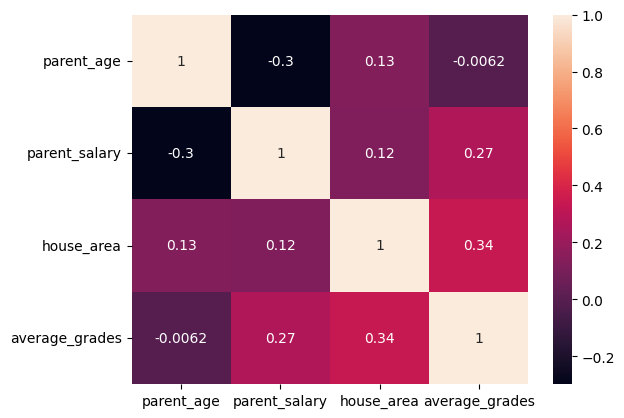

In [174]:
#numerical data ku correlation kandupidi
corr=num_train_data.corr()
corr
import seaborn as sns
sns.heatmap(corr,annot=True)

In [175]:
#categorical values ah map pannika idhuku neriya method iruku idhan bootcamp la solli kuduthanga
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
col=cat_train_data.columns
for columns in col:
    labelencoder.fit(train_data[columns])
    train_data[columns]=labelencoder.transform(train_data[columns])
for columns in col[:-1]:#training dataset la oru column kammi so ipdi seirom
    labelencoder.fit(test_data[columns])
    test_data[columns]=labelencoder.transform(test_data[columns])
train_data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,1,1,0,3,0,50.0,6450000.0,78.4,85.860000,1,0
1,1,0,1,4,1,54.0,5450000.0,70.3,86.131499,0,1
2,1,0,0,4,1,52.0,5520000.0,82.5,84.590000,0,1
3,0,0,1,2,0,52.0,3020000.0,50.6,86.131499,1,0
4,1,1,1,3,0,52.0,6120000.0,65.8,84.550000,1,0


<Axes: >

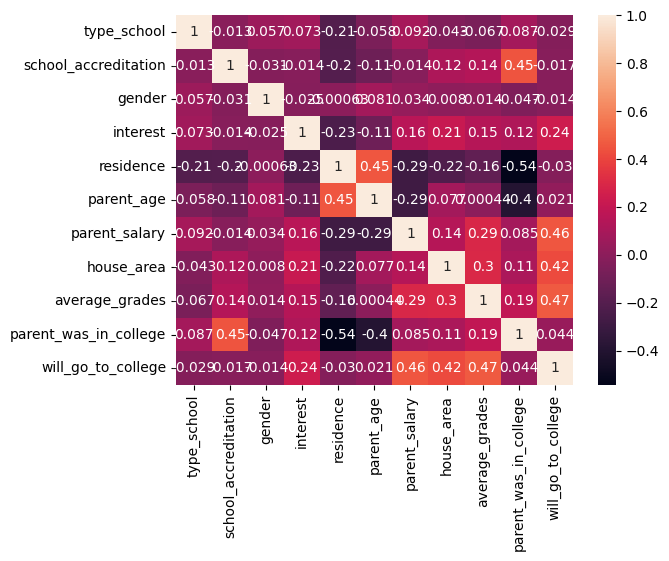

In [176]:
#ipa overall ah oru correlation matrix yen na ellame ipo nmerical data aagiruchu
corr=train_data.corr()
sns.heatmap(corr,annot=True)

In [177]:
test_data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,1,0,1,1,1,59.0,5390000.0,63.3,86.49,0
1,1,0,0,4,1,53.0,6150000.0,54.4,85.46,0
2,0,1,1,2,0,48.0,3320000.0,72.8,83.63,1
3,0,0,0,1,1,60.0,3670000.0,83.5,88.30,0
4,1,1,1,4,1,56.0,6040000.0,75.6,87.46,1


In [178]:
#idhula vandhu ella features aiyum scale pannuvanag adhadhu 0to1 ah aakuvanga adhuku oru formula iruku ahda use panni seivanga
from sklearn.preprocessing import MinMaxScaler
maxminscaler = MinMaxScaler()

for col in train_data.columns:
    if col != 'will_go_to_college':
        maxminscaler.fit(train_data[[col]])
        train_data[col] =maxminscaler.transform(train_data[[col]])
        test_data[col] =maxminscaler.transform(test_data[[col]])

In [179]:
#unmailaye aagiruchanu check pandrom paatha ellam maariduchu
test_data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,1.0,0.0,1.0,0.25,1.0,0.9375,0.497872,0.332362,0.537921,0.0
1,1.0,0.0,0.0,1.00,1.0,0.5625,0.605674,0.202624,0.465590,0.0
2,0.0,1.0,1.0,0.50,0.0,0.2500,0.204255,0.470845,0.337079,1.0
3,0.0,0.0,0.0,0.25,1.0,1.0000,0.253901,0.626822,0.665028,0.0
4,1.0,1.0,1.0,1.00,1.0,0.7500,0.590071,0.511662,0.606039,1.0


In [180]:
#idhula test train data pirichrupom namma target vandhu will go to college and matha ellame feature
from sklearn.model_selection import train_test_split
y=train_data['will_go_to_college']
x=train_data.drop(columns=['will_go_to_college'])
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=72)
print(train_x.shape)
test_x.shape

(536, 10)


(264, 10)

In [181]:
#idhu classification thane adhunala logistic use pandrom
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
logreg_ypred = logreg.predict(test_x)

In [182]:
#idhu innoru classification algo with same steps idhey maari aduthu oru moonu naalu algo use pannirupom
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_x,train_y)
xgb_ypred = xgb.predict(test_x)

In [183]:
from sklearn.svm import SVC

# Create a Support Vector Machine classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(train_x, train_y)

# Make predictions on the test data
svm_ypred = svm_classifier.predict(test_x)


In [184]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base decision tree classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with the base classifier
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=2.0)

# Train the classifier on the training data
ada_boost_classifier.fit(train_x, train_y)

# Make predictions on the test data
ada_boost_ypred = ada_boost_classifier.predict(test_x)


c:\Users\vijay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [185]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)

# Train the classifier on the training data
gbm_classifier.fit(train_x, train_y)

# Make predictions on the test data
gbm_ypred = gbm_classifier.predict(test_x)


In [186]:
from sklearn.metrics import f1_score
#ipa ella model kum f1 score calc pannanum and idhula edhu best nu paakanum
f1_score(test_y,logreg_ypred)

0.8028169014084507

In [187]:
f1_score(test_y,ada_boost_ypred)

0.2737642585551331

In [188]:
f1_score(test_y,svm_ypred)

0.8185053380782917

In [189]:
f1_score(test_y,xgb_ypred)

0.8398576512455516

In [190]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(train_x, train_y)

# Predict on the test data
random_forest_ypred = random_forest.predict(test_x)


In [191]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(test_y, random_forest_ypred)

# Calculate F1 score
f1 = f1_score(test_y, random_forest_ypred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.8371212121212122
F1 Score: 0.8458781362007168


In [192]:
from sklearn.model_selection import GridSearchCV
#f1 score la best edhunu paatha adhu xgb than varudhu so gridsearch use pannanum adhadhu best fit kandupidika use pandrom
paramdict={'n_estimators':[50,100], 'max_depth':[2,5] ,'learning_rate':[0.1,0.01]}
gridsearch = GridSearchCV(estimator=xgb,param_grid=paramdict,cv=5)
gridsearch.fit(train_x,train_y)
xgb_gsv_ypred=gridsearch.predict(test_x)


In [193]:
#indha f1 score vandhu xgb ah vida kammi ah than irukum yen na best fit epaiyume greatest ah irukadhu
f1_score(test_y,xgb_ypred)

0.8398576512455516

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,xgb_gsv_ypred)

array([[102,  26],
       [ 29, 107]], dtype=int64)

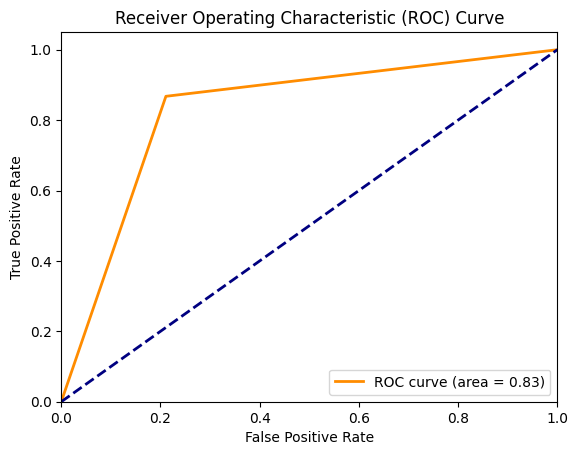

In [195]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y,xgb_ypred)

# Compute Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [196]:
#inga actual gridsearch lerndhu vandhadhu than use pannanum ana idhu pota than third aachum varom
#idhula enna seiromna idhu vara namma test.csv ah use pannala idhuvara namma train.csv ah use panni train pantom ipo test.csv ah predict panni vara answer ah submit pannanum
y_pred  = xgb.predict(test_data)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1])

In [197]:
y_pred = pd.DataFrame({'will_go_to_college': y_pred})

# Assign the 'Unique_ID' column to y_pred
y_pred['UniqueID'] = y_id

# Reorder the columns if needed
y_pred = y_pred[['UniqueID', 'will_go_to_college']]

# Print the DataFrame
print(y_pred)

     UniqueID  will_go_to_college
0         522                   0
1         738                   1
2         741                   0
3         661                   0
4         412                   1
..        ...                 ...
195       409                   1
196       333                   0
197       209                   1
198       614                   0
199        79                   1

[200 rows x 2 columns]


In [198]:
#idhu just andha csv file la append panndradhu than
y_pred.to_csv('submission.csv',index=False)